In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt


In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [3]:
# Create engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# sets up a foundation for us to build on in SQLAlchemy
Base = automap_base()
#reflect the schema from the tables to our code:
Base.prepare(engine, reflect=True)

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB to query data
session = Session(engine)

## Exploratory Climate Analysis

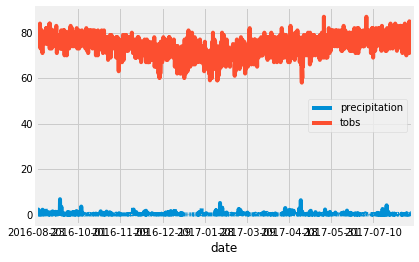

In [7]:
#Find the Date One Year Ago
prev_year = dt.date(2017, 8, 23)
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#creating a variable to store the results of the query 
results = []
#extracts all of the results from our query and put them in a list
results = session.query(Measurement.date, Measurement.prcp,Measurement.tobs ).filter(Measurement.date >= prev_year).all()
#save our results as a DataFrame
df = pd.DataFrame(results, columns=['date','precipitation', 'tobs'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

# Challenge
## Month of Jun

In [8]:
def month_temp(month):
     return session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
        filter(extract('month', Measurement.date)== month ).all()

In [26]:
jun_df= pd.DataFrame(month_temp(6))
Jun_df=(jun_df.rename(columns= { "Jun temperature in farenheit": "tobs",
                               "percipitatio": "prcp"})
       )
#pd.DataFrame(results, columns=['date','precipitation', 'tobs'])
#jun_df['Jun temperature in farenheit'] = jun_df["tobs"]   
#jun_df = jun_df['tobs'].drop
#jun_df= pd.DataFrame(jun_df['Jun temperature in farenheit'])
#Jun_df.rename_axis('')
Jun_df



,date,tobs,prcp
0,2010-06-01,78.0,0.00
1,2010-06-02,76.0,0.01
2,2010-06-03,78.0,0.00
3,2010-06-04,76.0,0.00
4,2010-06-05,77.0,0.00
...,...,...,...
1695,2017-06-26,79.0,0.02
1696,2017-06-27,74.0,0.10
1697,2017-06-28,74.0,0.02
1698,2017-06-29,76.0,0.04


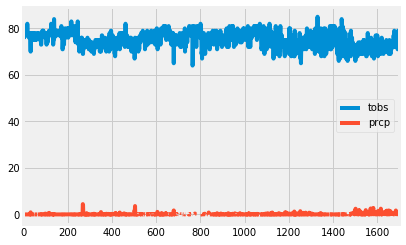

In [10]:
jun_df.plot()

In [11]:
#extracts all of the results from our query and put them in a list
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#save our results as a DataFrame
Jun_df = pd.DataFrame(results, columns=['date','precipitation'])
Jun_df.set_index(df['date'], inplace=True)
Jun_df

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-24,0.08
2016-08-23,2016-08-25,0.08
2016-08-23,2016-08-26,0.00
2016-08-23,2016-08-27,0.00
...,...,...
2017-08-22,2017-08-19,0.09
2017-08-23,2017-08-20,NaN
2017-08-23,2017-08-21,0.56


In [12]:
#Jun_df.describe()
Jun_summery=Jun_df.describe().rename_axis('describe')
Jun_summery

,precipitation
describe,
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
dec_df = pd.DataFrame(month_temp(12))
dec_df['Dec temperature in farenheit'] = dec_df["tobs"]
Dec_df = dec_df['tobs'].drop
Dec_df= pd.DataFrame(dec_df['Dec temperature in farenheit'])
Dec_summery=Dec_df.describe().rename_axis('describe')


In [14]:
summery_df = pd.merge(Jun_summery , Dec_summery, how ="outer" , on=["describe"])
min_max_mean = 
summery_df

SyntaxError: invalid syntax (<ipython-input-14-a331575db95b>, line 2)

In [ ]:
import datetime
plt.style.use('fivethirtyeight')
x = summery_df.plot(figsize=(20,6))
ax.set_title("temperature in farenheit")
ax.set_ylabel("Average Fare ($)")
ax.set_xlabel("Month")
ax.grid(True)
ax.legend(loc='best')
# ax.set_ylim(0,2500)
plt.show()
#summery_df.plot(figsize=(12,5))

In [ ]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

In [ ]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

In [ ]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)